In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Question 1 - Case B

#### My Roll Number ends with 24, hence Case B is solved
#### This file is submitted by co23btech11024
#### Explanations and observations are present in markdown cells of this file
#### q_p denotes q of question p (u_2 denotes u of question 2 ...)

In [3]:
alpha_1 = 1
f_1     = 1

dx_1 = 0.01
dt_1 = abs(f_1*(dx_1**2)/alpha_1)

x_1  = np.arange(0,1+dx_1,dx_1)

#### Crank Nicolson is unconditionally stable and 2nd order accurate
#### Hence taking dx=0.01 assures we get solution accurate upto 4 decimals 

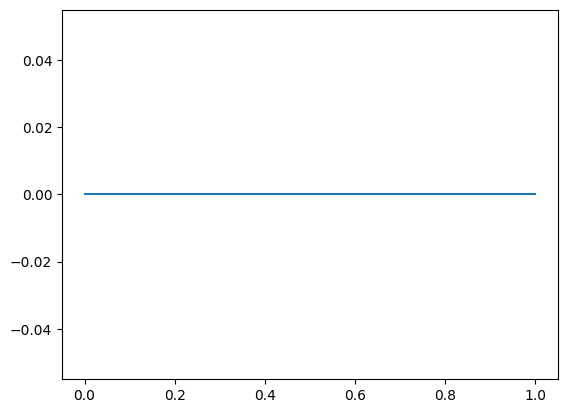

11000


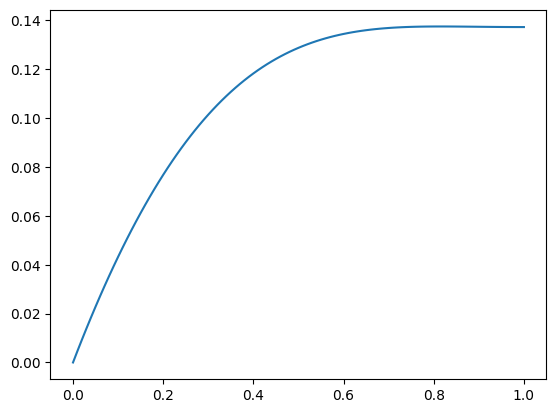

In [7]:
u_1 = np.zeros((x_1.shape[0], int((1.1-0)/dt_1)+1))
# for i in range(u_1.shape[0]):
#     u_1[i][0] = pulse_initial_1(x_1[i], x1_1, x2_1, a_1)

plt.plot(x_1, u_1[:,0])
plt.show()


for j in range(u_1.shape[1]-1):
    
    dummy = np.zeros((x_1.shape[0],1))
    # dummy[0][0] = 0
    # dummy[x_1.shape[0]-1][0] = 0
    
    dummy_a = np.zeros((x_1.shape[0],x_1.shape[0]))
    dummy_a[0][0] = 1
    # dummy_a[x_1.shape[0]-1][x_1.shape[0]-1] = 1
     
    for i in range(1, u_1.shape[0]):     
        if i != u_1.shape[0]-1:
            dummy[i] = (f_1/2)*u_1[i+1][j] + (1 - f_1)*u_1[i][j] + (f_1/2)*u_1[i-1][j] + (np.cos(np.pi*x_1[i]/2)**2)*dt_1
    
            dummy_a[i][i-1] = -f_1/2
            dummy_a[i][i]   = 1 + f_1
            dummy_a[i][i+1] = -f_1/2
        else:
            dummy[i] = (1 - f_1)*u_1[i][j] + (f_1)*u_1[i-1][j] + (np.cos(np.pi*x_1[i]/2)**2)*dt_1
    
            dummy_a[i][i-1] = -f_1
            dummy_a[i][i]   = 1 + f_1
            
    ans_dummy = np.linalg.solve(dummy_a, dummy)
    u_1[:,j+1]=ans_dummy[:,0]
            
    if (j+1) == u_1.shape[1]-1:
        plt.plot(x_1, u_1[:, j+1])
        print(j+1)
        plt.show()

### Question 2 - Case B

#### My Roll Number ends with 24, hence Case B is solved

#### Crank Nicolson is unconditionally stable and 2nd order accurate
#### Hence taking dx=0.01 assures we get solution accurate upto 4 decimals 

In [3]:
alpha_2 = 1
f_2     = 1

dx_2 = 0.01
dt_2 = abs(f_2*(dx_2**2)/alpha_2)

x_2  = np.arange(0,1+dx_2,dx_2)

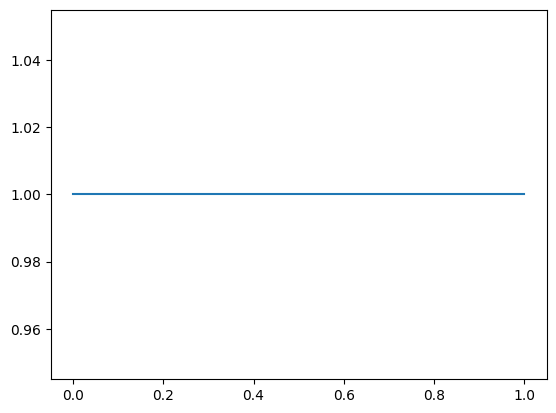

11000


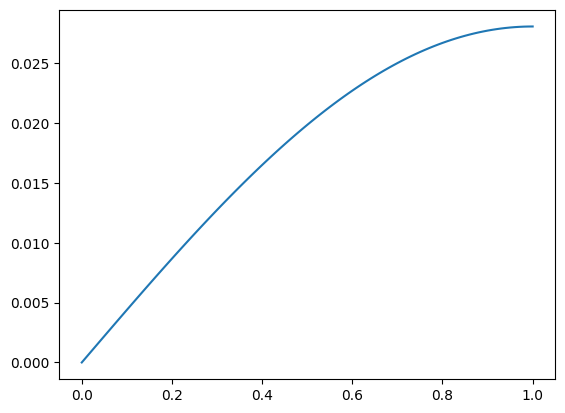

In [4]:
u_2 = np.ones((x_2.shape[0], int((1.1-0)/dt_2)+1))
# for i in range(u_2.shape[0]):
#     u_2[i][0] = pulse_initial_2(x_2[i], x1_2, x2_2, a_2)

plt.plot(x_2, u_2[:,0])
plt.show()


for j in range(u_2.shape[1]-1):
    
    dummy = np.zeros((x_2.shape[0],1))
    # dummy[0][0] = 0
    # dummy[x_2.shape[0]-1][0] = 0
    
    dummy_a = np.zeros((x_2.shape[0],x_2.shape[0]))
    dummy_a[0][0] = 1
    # dummy_a[x_2.shape[0]-1][x_2.shape[0]-1] = 1
     
    for i in range(1, u_2.shape[0]):     
        if i != u_2.shape[0]-1:
            dummy[i] = (f_2/2)*u_2[i+1][j] + (1 - f_2 - dt_2/2)*u_2[i][j] + (f_2/2)*u_2[i-1][j]
    
            dummy_a[i][i-1] = -f_2/2
            dummy_a[i][i]   = 1 + f_2 + dt_2/2
            dummy_a[i][i+1] = -f_2/2
        else:
            dummy[i] = (1 - f_2 - dt_2/2)*u_2[i][j] + (f_2)*u_2[i-1][j]
    
            dummy_a[i][i-1] = -f_2
            dummy_a[i][i]   = 1 + f_2 + dt_2/2
            
    ans_dummy = np.linalg.solve(dummy_a, dummy)
    u_2[:,j+1]=ans_dummy[:,0]
            
    if (j+1) == u_2.shape[1]-1:
        plt.plot(x_2, u_2[:, j+1])
        print(j+1)
        plt.show()

 ### Question 3

In [7]:
def pulse_initial_3(x, w, ti, tf):
    return (x*(tf-ti)/w) + ti 

In [8]:
w_3 = 10 * 1e-2
alpha_3 = 1e-5
a_3 = 0.04 * 1e-2
ti_3 = 30
tf_3 = 60

dx_3 = 1e-3
f_3 = 1/2
c_3 = 0.5
dt_3 = abs(f_3*(dx_3**2)/alpha_3)
x_3  = np.arange(0,w_3+dx_3,dx_3)

#### Here, 10 timeinstants are plotted together in a plot. Scroll down to see how u evolves over time

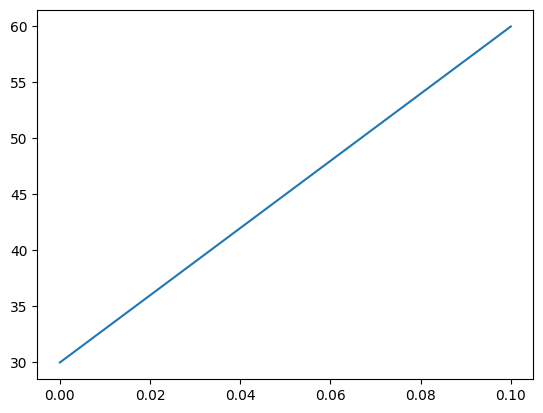

10


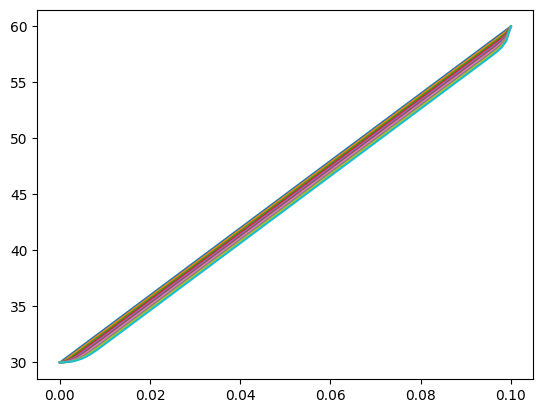

20


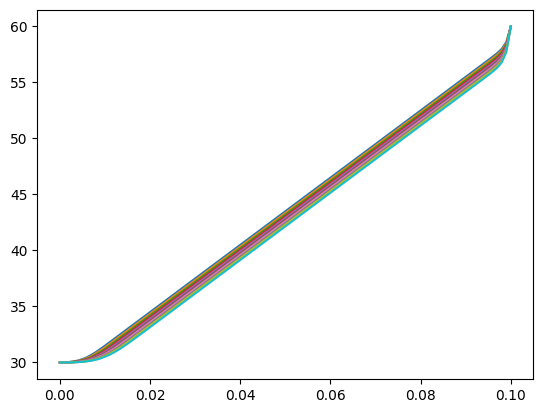

30


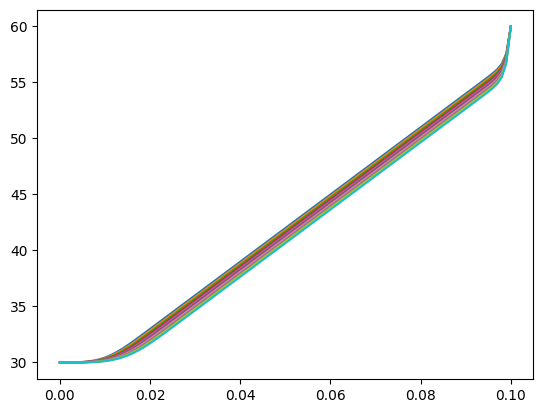

40


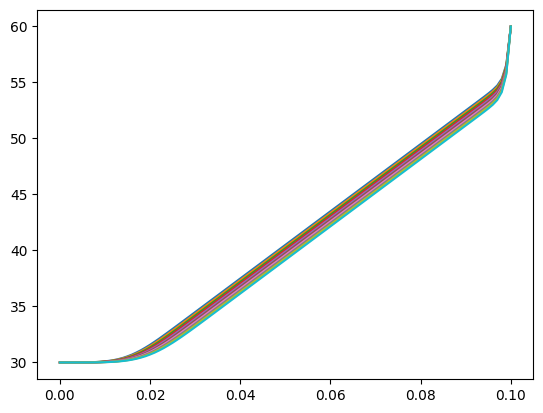

50


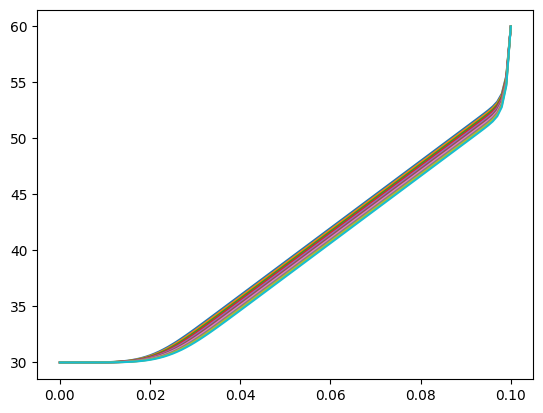

60


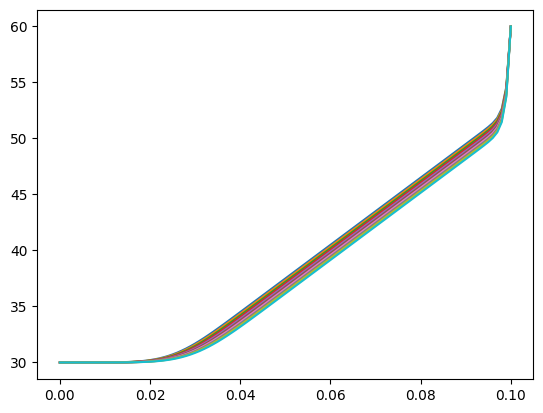

70


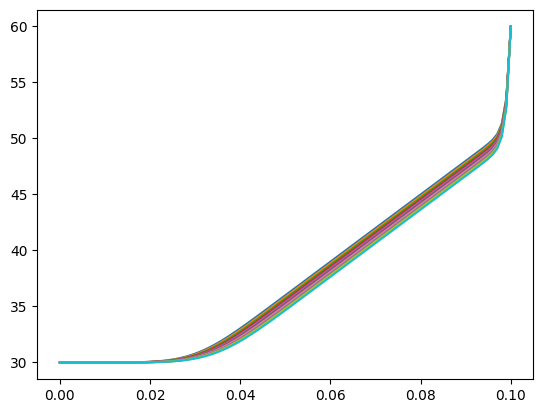

80


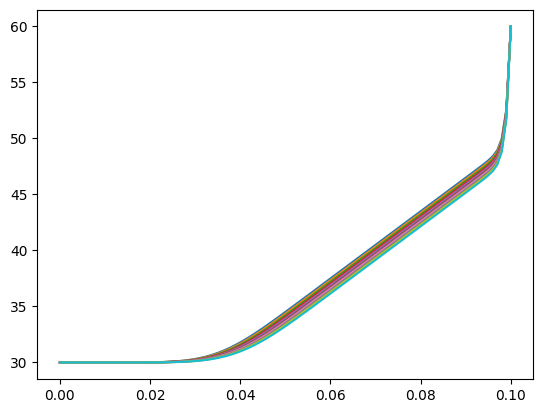

90


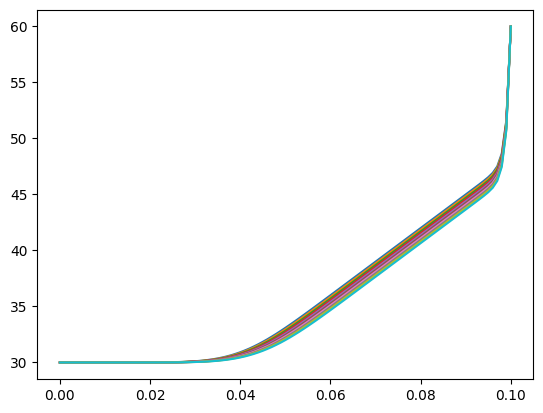

100


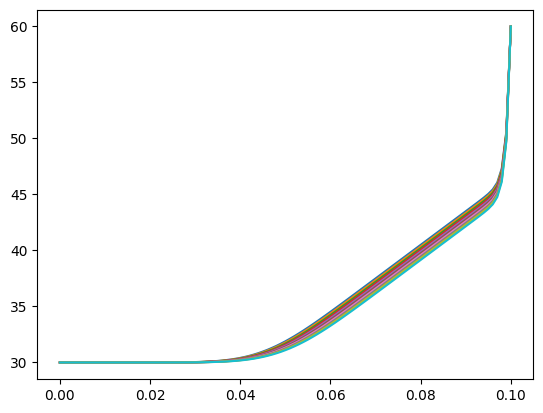

110


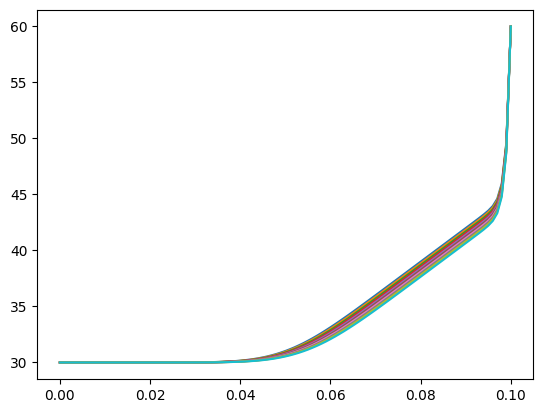

120


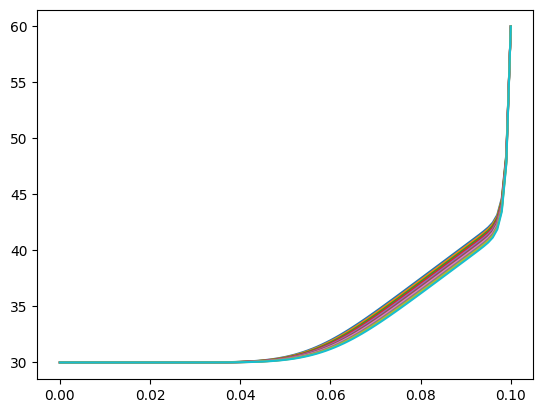

130


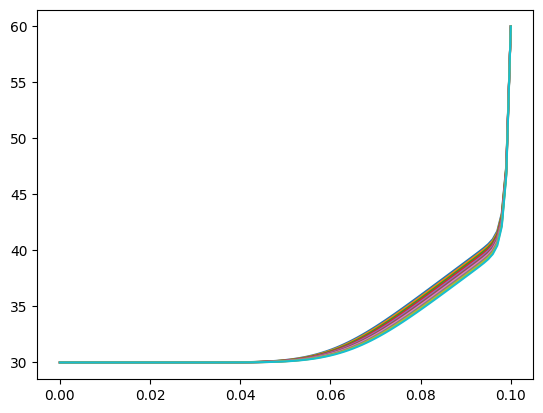

140


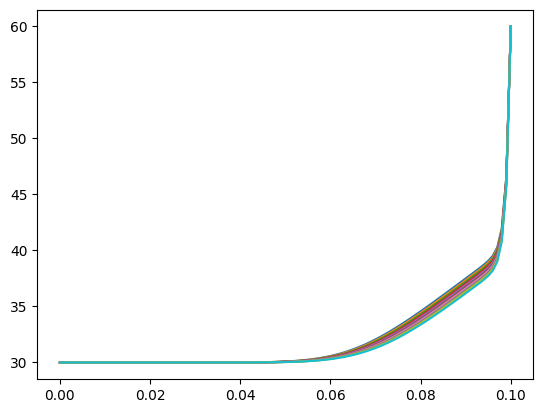

In [9]:
u_3 = np.zeros((x_3.shape[0], int((7-0)/dt_3)+1))
for i in range(u_3.shape[0]):
    u_3[i][0] = pulse_initial_3(x_3[i], w_3, ti_3, tf_3)

u_3[0,:] = ti_3
u_3[u_3.shape[0]-1,:] = tf_3
# print(u_3)

plt.plot(x_3, u_3[:,0])
plt.show()

for j in range(u_3.shape[1]-1):
    for i in range(1, u_3.shape[0]-1):
        u_3[i][j+1] = (u_3[i-1][j]*(f_3 + math.copysign(c_3, a_3)/2)) + (u_3[i][j]*(1 - 2*f_3)) + (u_3[i+1][j]*(f_3 - math.copysign(c_3, a_3)/2))
    plt.plot(x_3, u_3[:, j])
    if (j+1)%10==0:
        print(j+1)
        plt.show()

### Question 4

In [17]:
w_4 = 0.2
alpha_4 = 1e-4
a_4 = 0.01
ti_4 = 30
tf_4 = 100

dx_4 = 0.02
f_4 = 1/2
c_4 = 1
dt_4 = abs(f_4*(dx_4**2)/alpha_4)
x_4  = np.arange(0,w_4+dx_4,dx_4)

#### Peclect Number is c/f
#### Perlect Number = (a*dt/dx)/(alpha*dt/dx**2) = a*dx/alpha
#### Perlect Number = Rate of Advection / Rate of Diffusion
#### Here Perlect Number > 1, Hence Advection dominates

In [18]:
print("Peclect Number:", a_4*dx_4/alpha_4)
if c_4/f_4>1:
    print("Advection dominates Diffusion")
elif c_4/f_4 == 1:
    print("Advection and Diffusion are in same rates")
else:
    print("Diffusion dominates Advection")

Peclect Number: 2.0
Advection dominates Diffusion


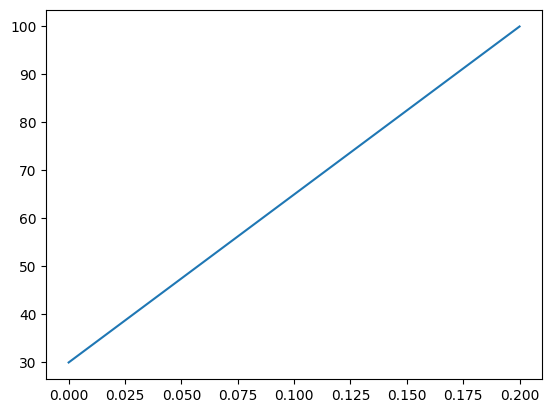

10


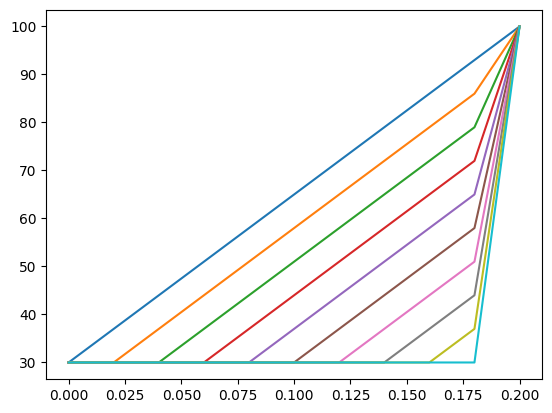

In [19]:
u_4 = np.zeros((x_4.shape[0], 10+1))
for i in range(u_4.shape[0]):
    u_4[i][0] = pulse_initial_3(x_4[i], w_4, ti_4, tf_4)

u_4[0,:] = ti_4
u_4[u_4.shape[0]-1,:] = tf_4
# print(u_4)

plt.plot(x_4, u_4[:,0])
plt.show()

for j in range(u_4.shape[1]-1):
    for i in range(1, u_4.shape[0]-1):
        u_4[i][j+1] = (u_4[i-1][j]*(f_4 + math.copysign(c_4, a_4)/2)) + (u_4[i][j]*(1 - 2*f_4)) + (u_4[i+1][j]*(f_4 - math.copysign(c_4, a_4)/2))
    plt.plot(x_4, u_4[:, j])
    if (j+1)%10==0:
        print(j+1)
        plt.show()

### Question 5

In [154]:
def tdma(A,b):
    n = A.shape[0]
    p = np.zeros(n)
    q = np.zeros(n)
    sol = np.zeros((n,1))
    
    for i in range(n):
        if i == 0:
            p[i] = -A[i][i+1] / (A[i][i])
            q[i] = (b[i]) / (A[i][i])
        elif i == n-1:
            p[i] = 0
            q[i] = (b[i] - (A[i][i-1] * q[i-1])) / (A[i][i] + (p[i-1] * A[i][i-1]))
        else:
            p[i] = -A[i][i+1] / (A[i][i] + (p[i-1] * A[i][i-1]))
            q[i] = (b[i] - (A[i][i-1] * q[i-1])) / (A[i][i] + (p[i-1] * A[i][i-1]))

    i = n-1
    while i>=0:
        if i == n-1:
            sol[i][0] = q[i]
        else:
            sol[i][0] = q[i] + (p[i] * sol[i+1][0])
        
        i -= 1

    return sol

In [155]:
alpha_5 = 1
f_5     = 0.5

dx_5 = 0.01
dt_5 = abs(f_5*(dx_5**2)/alpha_5)

x_5  = np.arange(0,1+dx_5,dx_5)

#### In below plot, all 10 time instants are plotted together in a single plot
#### Values of peaks for each time instant is printed as graphs of every timestamp very close to each other

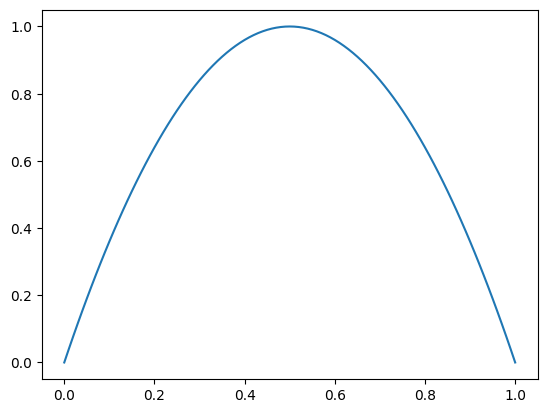

C:\Users\vishn\AppData\Local\Temp\ipykernel_23876\1804168995.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q[i] = (b[i]) / (A[i][i])
C:\Users\vishn\AppData\Local\Temp\ipykernel_23876\1804168995.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q[i] = (b[i] - (A[i][i-1] * q[i-1])) / (A[i][i] + (p[i-1] * A[i][i-1]))
C:\Users\vishn\AppData\Local\Temp\ipykernel_23876\1804168995.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q[i] = (b[i] - (A[i][i-1] * q

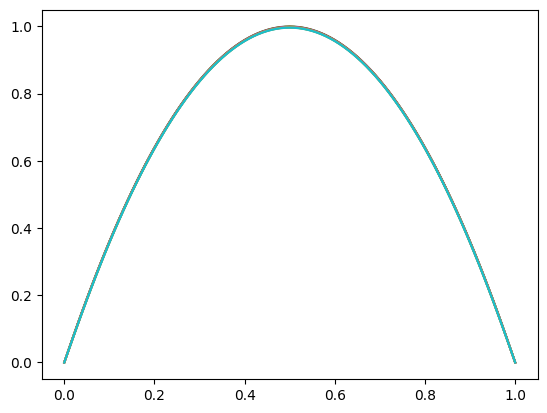

In [160]:
u_5 = np.ones((x_5.shape[0], 10+1))
for i in range(u_5.shape[0]):
    u_5[i][0] = 4*x_5[i]*(1-x_5[i])

plt.plot(x_5, u_5[:,0])
plt.show()


for j in range(u_5.shape[1]-1):
    
    dummy = np.zeros((x_5.shape[0],1))
    # dummy[0][0] = 0
    # dummy[x_5.shape[0]-1][0] = 0
    
    dummy_a = np.zeros((x_5.shape[0],x_5.shape[0]))
    dummy_a[0][0] = 1
    dummy_a[x_5.shape[0]-1][x_5.shape[0]-1] = 1
     
    for i in range(1, u_5.shape[0]-1):     
        dummy[i] = (f_5/2)*u_5[i+1][j] + (1 - f_5)*u_5[i][j] + (f_5/2)*u_5[i-1][j]

        dummy_a[i][i-1] = -f_5/2
        dummy_a[i][i]   = 1 + f_5
        dummy_a[i][i+1] = -f_5/2
            
    ans_dummy  = tdma(dummy_a, dummy)
    ans_dummy  = np.reshape(ans_dummy, (ans_dummy.shape[0], 1))
    u_5[:,j+1] = ans_dummy[:,0]

    print(u_5[np.argmax(u_5[:, j+1])][j+1])
    
    plt.plot(x_5, u_5[:, j+1])
plt.show()


### Question 6

In [2]:
def pulse_initial_6(x,dum):
    return dum*(1 + np.exp(-x))

In [10]:
alpha_6 = 1
a_6 = -0.5

dx_6 = 1e-3
f_6 = 1/2
c_6 = 1
dt_6 = abs(c_6*(dx_6)/a_6)
x_6  = np.arange(0,1+dx_6,dx_6)

#### Here I have applied ftcscs scheme, where for stability 0 <= c <= 1 and 0 <= f <= 0.5
#### I have plotted till 1.6 sec, as graphs after this time seem to show no significant change in values

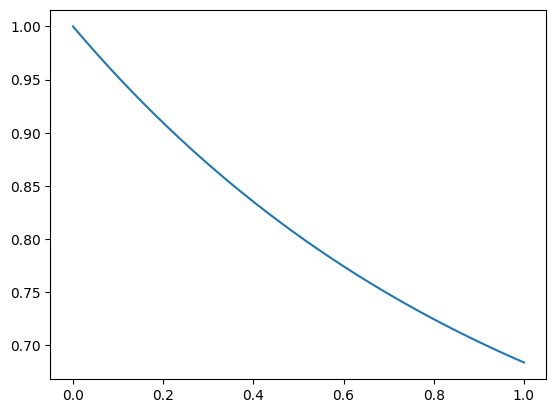

5000


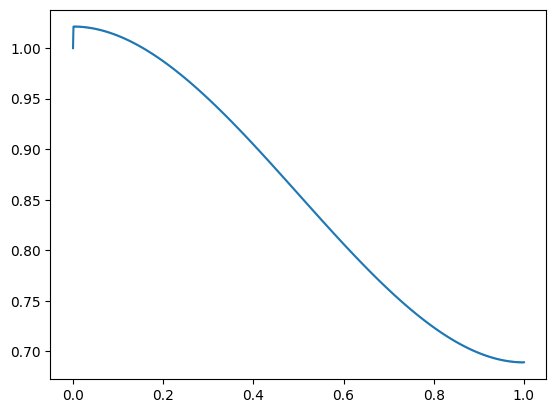

In [11]:
u_6 = np.ones((x_6.shape[0], int((10-0)/dt_6)+1))
for i in range(u_6.shape[0]):
    u_6[i][0] = pulse_initial_6(x_6[i], 0.5)

# u_6[0,:] = ti_6
# u_6[u_6.shape[0]-1,:] = tf_6
# print(u_6)

plt.plot(x_6, u_6[:,0])
plt.show()

for j in range(u_6.shape[1]-1):
    for i in range(1, u_6.shape[0]):
        if i != u_6.shape[0]-1:
            u_6[i][j+1] = (u_6[i-1][j]*(f_6 + math.copysign(c_6, a_6)/2)) + (u_6[i][j]*(1 - 2*f_6)) + (u_6[i+1][j]*(f_6 - math.copysign(c_6, a_6)/2)) + (x_6[i]*(1-x_6[i])*dt_6)
        else:
            u_6[i][j+1] = (u_6[i-1][j]*(2 * f_6)) + (u_6[i][j]*(1 - 2*f_6))  + (x_6[i]*(1-x_6[i])*dt_6)
            
    if (j+1) == u_6.shape[1]-1:
        plt.plot(x_6, u_6[:, j])
        print(j+1)
        plt.show()

### Question 7

In [41]:
alpha_7 = 1
f_7     = 0.5

dx_7 = 0.01
dt_7 = abs(f_7*(dx_7**2)/alpha_7)

x_7  = np.arange(0,1+dx_7,dx_7)

#### Here we have non linear boundary condition which is linearised to be used in fdm
#### Here its linearised using a guess value for that instant

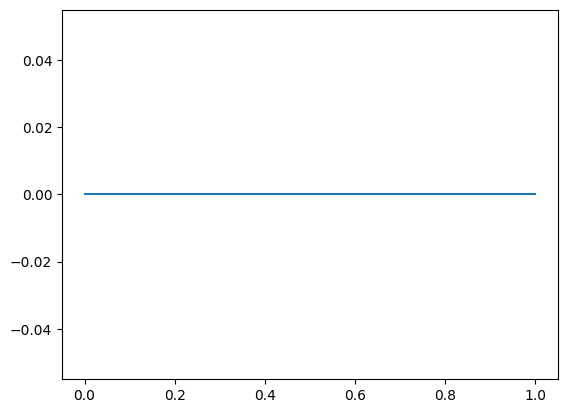

22000


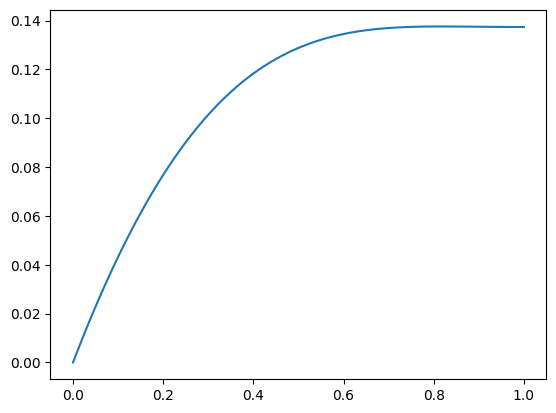

In [40]:
u_7 = np.zeros((x_7.shape[0], int((1.1-0)/dt_7)+1))
plt.plot(x_7, u_7[:,0])
plt.show()

for j in range(u_7.shape[1]-1):
    
    for i in range(1, u_7.shape[0]):     
        if i != u_7.shape[0]-1:
            u_7[i][j+1] = (u_7[i-1][j] + u_7[i+1][j]) * f_7 + u_7[i][j] * (1 - 2*f_7) + (np.cos(np.pi*x_7[i]/2)**2)*dt_7
        else:
            delta = 1e5
            while(abs(delta) > 1e-6):
                prev = u_7[i][j+1]
                u_7[i][j+1] = (u_7[i-1][j]) * 2* f_7 + u_7[i][j] * (1 - 2*f_7 + f_7*4*dx_7*(prev**3)) + (-3*f_7*dx_7*(prev**4)) + (np.cos(np.pi*x_7[i]/2)**2)*dt_7
                delta = u_7[i][j+1] - prev
                # print(prev, delta, j)
        # print(j,i)
        # print(prev)
        # print(delta)
        
    if (j+1) == u_7.shape[1]-1:
        plt.plot(x_7, u_7[:, j+1])
        print(j+1)
        plt.show()

### Question 10

#### After non dimensionalising , we solve for tho(u)/tho_tou = tho^2(u)/tho_eta^2 (tou: Non dimensional time, eta: Non dimensional space)

In [35]:
alpha_10 = 1
f_10     = 0.5

dx_10 = 0.1
dt_10 = abs(f_10*(dx_10**2)/alpha_10)

x_10  = np.arange(0,1+dx_10,dx_10)

#### We can see that non dimensional temperature keeps on decreasing as time progress

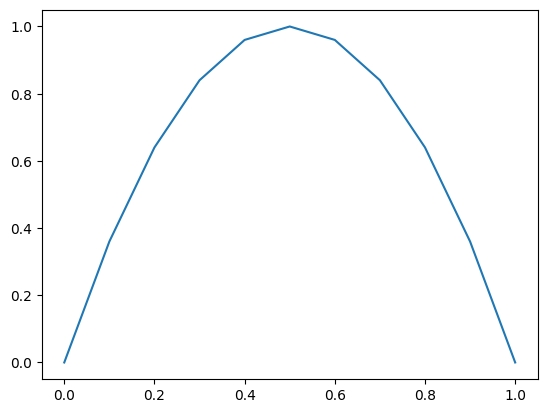

9


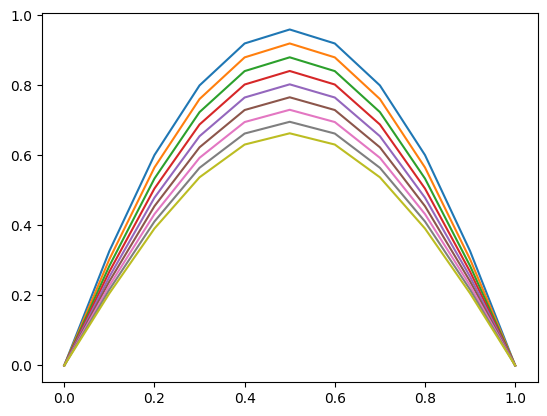

[0.         0.20598433 0.39128544 0.53767434 0.63123436 0.66338204
 0.63123436 0.53767434 0.39128544 0.20598433 0.        ]


In [59]:
u_10 = np.ones((x_10.shape[0], int((0.05-0)/dt_10)+1))
for i in range(u_10.shape[0]):
    u_10[i][0] = 4*x_10[i]*(1-x_10[i])

plt.plot(x_10, u_10[:,0])
plt.show()


for j in range(u_10.shape[1]-1):
    
    dummy = np.zeros((x_10.shape[0],1))
    # dummy[0][0] = 0
    # dummy[x_10.shape[0]-1][0] = 0
    
    dummy_a = np.zeros((x_10.shape[0],x_10.shape[0]))
    dummy_a[0][0] = 1
    dummy_a[x_10.shape[0]-1][x_10.shape[0]-1] = 1
     
    for i in range(1, u_10.shape[0]-1):     
        dummy[i] = (f_10/2)*u_10[i+1][j] + (1 - f_10)*u_10[i][j] + (f_10/2)*u_10[i-1][j]

        dummy_a[i][i-1] = -f_10/2
        dummy_a[i][i]   = 1 + f_10
        dummy_a[i][i+1] = -f_10/2
            
    ans_dummy  = np.linalg.solve(dummy_a, dummy)
    u_10[:,j+1] = ans_dummy[:,0]
            
    plt.plot(x_10, u_10[:, j+1])
    if (j+1) == u_10.shape[1]-1:
        print(j+1)
        plt.show()
        print(u_10[:,j+1])

### Question 9

In [43]:
alpha_9  = 1
f_x_9    = 1
f_y_9    = 1

c1_9 = 0.5
c2_9 = 0.5

dx_9 = 0.1
dy_9 = 0.1
dt_9 = abs(f_x_9*(dx_9**2)/alpha_9)

x_9  = np.arange(0,1+dx_9,dx_9)
y_9  = np.arange(0,1+dy_9,dy_9)

In [44]:
u_9 = np.zeros((x_9.shape[0], y_9.shape[0], int((1.1-0)/dt_9)+1))
print(u_9.shape)
u_9.shape[2]

(11, 11, 110)


110

#### Here this is an implicit scheme, hence an coefficient matrix is formed then values at nodal points are solved
#### Solved solution vector in each vector is in u_0_0, u_1_0,.., u_n-1_0, u_0_1, u_1_1,.., u_n-1_n-1 

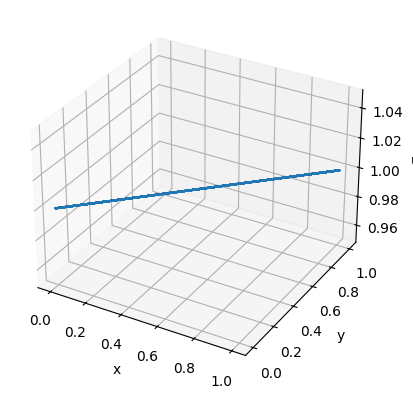

109


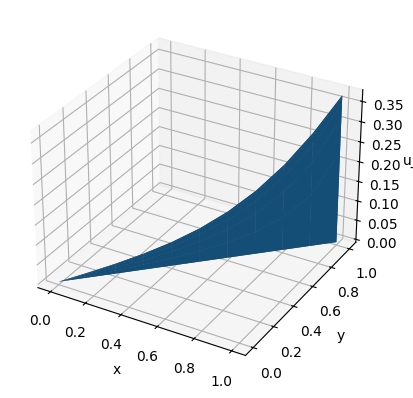

In [47]:
u_9 = np.zeros((x_9.shape[0], y_9.shape[0], int((1.1-0)/dt_9)+1))
# for i in range(u_9.shape[0]):
#     u_9[i][0] = pulse_initial_9(x_9[i], x1_9, x2_9, a_9)

u_9[:,:,0] = 1

fig = plt.figure()
ax  = plt.axes(projection = '3d', xlabel = 'x', ylabel = 'y', zlabel = 'u')
ax.plot3D(x_9, y_9,u_9[:,:,0])
plt.show()


for k in range(u_9.shape[2]-1):
    
    dummy = np.zeros((x_9.shape[0]*y_9.shape[0],1))
    # dummy[0][0] = 0
    # dummy[x_9.shape[0]-1][0] = 0
    
    dummy_a = np.zeros((x_9.shape[0]*y_9.shape[0],x_9.shape[0]*y_9.shape[0]))
    for j in range(u_9.shape[1]):     
        for i in range(u_9.shape[0]):
            
            if i == 0 or j == 0 or i == u_9.shape[0]-1:
                dummy[(i)+(j)*u_9.shape[1]][0] = 0
                dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]] = 1
            else:
                if i == 1:
                    if j == 1:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + (u_9[i-1][j][k+1]*f_x_9 + u_9[i][j-1][k+1]*f_y_9)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j+1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + f_y_9)
                    elif j == u_9.shape[1] - 1:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + c2_9 * f_y_9 + (u_9[i-1][j][k+1]*f_x_9)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j-1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + (f_y_9 * (1 + (c1_9 * dy_9/alpha_9))))
                    else:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + (u_9[i-1][j][k+1]*f_x_9)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j-1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j+1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + f_y_9)

                    dummy_a[(i)+(j)*u_9.shape[1]][(i+1)+(j)*u_9.shape[1]] = -f_x_9

                elif i == u_9.shape[0] -2:
                    if j == 1:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + (u_9[i+1][j][k+1]*f_x_9 + u_9[i][j-1][k+1]*f_y_9)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j+1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + f_y_9)
                    elif j == u_9.shape[1] - 1:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + c2_9 * f_y_9 + (u_9[i+1][j][k+1]*f_x_9)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j-1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + (f_y_9 * (1 + (c1_9 * dy_9/alpha_9))))   
                    else:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + (u_9[i+1][j][k+1]*f_x_9)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j-1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j+1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + f_y_9)
                        
                    dummy_a[(i)+(j)*u_9.shape[1]][(i-1)+(j)*u_9.shape[1]] = -f_x_9

                else:
                    if j == 1:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + (u_9[i][j-1][k+1]*f_y_9)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j+1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + f_y_9)
                    elif j == u_9.shape[1] - 1:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + c2_9 * f_y_9 + (0)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j-1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + (f_y_9 * (1 + (c1_9 * dy_9/alpha_9))))   
                    else:
                        dummy[(i)+(j)*u_9.shape[1]][0] = u_9[i][j][k] + (0)
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j-1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j+1)*u_9.shape[1]] = -f_y_9
                        dummy_a[(i)+(j)*u_9.shape[1]][(i)+(j)*u_9.shape[1]]   = 1 + 2 * (f_x_9 + f_y_9)
                        
                    dummy_a[(i)+(j)*u_9.shape[1]][(i-1)+(j)*u_9.shape[1]] = -f_x_9
                    dummy_a[(i)+(j)*u_9.shape[1]][(i+1)+(j)*u_9.shape[1]] = -f_x_9
                        
    ans_dummy = np.linalg.solve(dummy_a, dummy)
    # u_9[:,:,k+1]=ans_dummy[:,0]
    for j in range(u_9.shape[1]):     
        for i in range(u_9.shape[0]):
            u_9[i][j][k+1] = ans_dummy[(i)+(j)*u_9.shape[1]][0]
            
    if (k+1) == u_9.shape[2]-1:
        print(k+1)
        fig = plt.figure()
        ax  = plt.axes(projection = '3d', xlabel = 'x', ylabel = 'y', zlabel = 'u_9')
        ax.plot_surface(x_9, y_9,u_9[:,:,k+1])
        plt.show()